In [1]:
%reset -f
import scipy.integrate as si
import numpy as np
import matplotlib.pyplot as plt
import chameleon as c
import time

In [2]:
def sig_a(env, t):
    return -(np.sin(env.pos_init) ** 2) * np.sin(t) ** 2


def integrate_to_t(env, t):
    """Integrate the environment from 0 to t"""
    time_steps = int(t / env.dt)
    t_arr = np.linspace(0, t, time_steps)
    for t in t_arr:
        sig = sig_a(env, t)
        env.one_step_return(sig)
    return

# I want to have the rod in an initially overstretched position. 
I need to update the boundary conditions in `env.U0` to ensure that happens

In [20]:
m = 2
L = 10
cd = 10
a = 3
E = 4
T = 0.50
env = c.Chameleon(dt=T / 1000, c=cd, m=m, init_length=L, alpha=a, E=E)
env.u_current = np.sin(env.pos_init)
env.u_hist.append(env.u_current)
env.U0[0] = env.u_current[-1]
env.U0[1] = 1

In [21]:
integrate_to_t(env, T)

In [22]:
a = [
    {0.0},
    {0.099374},
    {0.194854},
    {0.282682},
    {0.359367},
    {0.421811},
    {0.467436},
    {0.494283},
    {0.501109},
    {0.487448},
    {0.453659},
    {0.400922},
    {0.331214},
    {0.247238},
    {0.152319},
    {0.0502633},
    {-0.054805},
    {-0.158627},
    {-0.256999},
    {-0.345961},
    {-0.42197},
    {-0.48205},
    {-0.52391},
    {-0.546034},
    {-0.547719},
    {-0.529092},
    {-0.491078},
    {-0.435349},
    {-0.364239},
    {-0.280641},
    {-0.1879},
    {-0.0896768},
    {0.0101733},
    {0.107741},
    {0.199194},
    {0.280914},
    {0.349627},
    {0.402524},
    {0.437375},
    {0.45263},
    {0.447495},
    {0.421981},
    {0.376929},
    {0.313991},
    {0.235579},
    {0.144773},
    {0.0451987},
    {-0.0591305},
    {-0.163989},
    {-0.265127},
    {-0.358461},
]
a = [s.pop() for s in a]

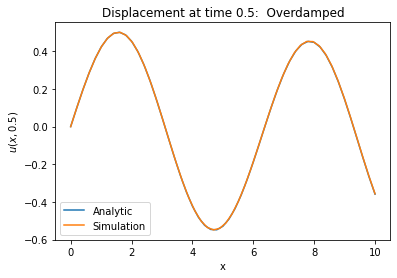

In [23]:
plt.plot(np.linspace(0, env.length, len(a)), a)
plt.plot(env.pos_init, env.u_current)
plt.legend(("Analytic", "Simulation"))
plt.title(f"Displacement at time {T}:  Overdamped")
plt.xlabel("x")
plt.ylabel(f"$u(x, {T})$")
plt.show()

In [24]:
# import pickle
# l = [1,2,3,4]
# with open("pos_hist", "wb") as fp:
#     pickle.dump(env.pos_history, fp)

# with open("test", "rb") as fp:
#     b = pickle.load(fp)

In [25]:
env.u_velocity_history[:10]

[0.9999999999998899,
 1.0108610294603526,
 1.0083078265223921,
 1.0057611401219635,
 1.0032209537018666,
 1.0006872507397624,
 0.9981600147579428,
 0.9956392293224425,
 0.9931248780390423,
 0.99061694455993]